In [1]:
import requests 
from selenium import webdriver as wd 
from selenium.webdriver.common.by import By 
from selenium.webdriver.support.ui import WebDriverWait 
from selenium.webdriver.support import expected_conditions as EC
import time
import random
import re
import pandas as pd
import json # import json module
%matplotlib inline
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [5]:
with open('데일리에너지드링크.json') as json_file:
    json_data = json.load(json_file)

In [6]:
df = pd.DataFrame(json_data['data'])

In [7]:
df

,index,Post,Hashtags,Locates,Date,Likes
0,0,[카페인 달고살던 평일은 이제 그만 보내...,"[아이폰, 아이폰x, shotoniphone, 휴식, 주말, 금요일, 박카스, 광고...",[서울 어딘가],2020년 10월 16일,[327]
1,1,[2020.3.3🍺박카스🍺\n😎유튜브에 과정 영상 있습니다😎\n.\n.\n.\n.\...,"[기초디자인, 기디, 개체묘사, 개체표현, 드로잉, 일러스트, 미대입시, 미술, 수...","[Busan 釜山, South Korea]",2020년 4월 26일,"[1,166]"
2,2,[#예스24굿즈 #10월예스24굿즈 #증정이벤트\nYES24X박카스(@dongaba...,"[예스24굿즈, 10월예스24굿즈, 증정이벤트, 박카스폴딩박스SET, 박카스와펜보냉...",[],2020년 10월 15일,"[2,008]"
3,3,[박카스🥃유튜브에 과정 영상 있습니다\nChe...,"[기초디자인, 기디, 개체묘사, 개체표현, 드로ᄋ...",[],2020년 9월 1일,"[1,268]"
4,4,[내 최애💛박카스젤리 신맛💛신상 뜸!!!!\n신맛 가루가 챱챱 붙어있는데\n쫀득쫀득...,"[박카스젤리신맛, 박카스젤리사우어, 박카스젤리, 박카스, 젤리, 박카스맛젤리신맛, ...",[],2020년 10월 13일,"[1,134]"
...,...,...,...,...,...,...
19995,19995,[#비타500_모델_펭수#비타500 #건강한비타민C #카페인대신비타500],"[비타500_모델_펭수, 비타500, 건강한비타민C, 카페인대신비타500]",[],2020년 8월 20일,[]
19996,19996,[#비타500_모델_펭수#비타500 #건강한비타민C #카페인대신비타500],"[비타500_모델_펭수, 비타500, 건강한비타민C, 카페인대신비타500]",[],2020년 8월 20일,[]
19997,19997,[#비타500_모델_펭수#비타500 #건강한비타민C #카페인대신비타500],"[비타500_모델_펭수, 비타500, 건강한비타민C, 카페인대신비타500]",[],2020년 8월 20일,[]
19998,19998,[#비타500_모델_펭수#비타500 #건강한비타민C #카페인대신비타500],"[비타500_모델_펭수, 비타500, 건강한비타민C, 카페인대신비타500]",[],2020년 8월 20일,[]


# Hashtags 분석

# 1. Word Cloud

In [95]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

In [96]:
tags = [element for array in list(df.Hashtags) for element in array]

In [97]:
tags[0:5]

['아이폰', '아이폰x', 'shotoniphone', '휴식', '주말']

In [98]:
deg_stop_words = ['error','몬스터에너지','몬스터', '에너지','monsterenergy', '에너지드링크','박카스','비타500'\
                     , '몬스터에너지울트라', '캔구루', '핫식스', '레드불', '비타500', '카페인대신비타500', '카페인대신비타500	'\
                     '건강한비타민c', 'redbull','건강한비타민c', '카페인대신비타500','건강한비타민c','비타500_모델_펭수','펭수',\
                 '500', 'vita500', '펭수']

In [99]:
cv = CountVectorizer(max_features=10000, stop_words = deg_stop_words)

In [100]:
tdm = cv.fit_transform(tags)

In [101]:
word_count = pd.DataFrame({
    '단어': cv.get_feature_names(),
    '빈도': tdm.sum(axis=0).flat 
})

In [102]:
word_count.sort_values('빈도', ascending=False).head()

,단어,빈도
7254,일상,1536
792,광동제약,1253
1030,일상,1168
925,비타챙겨,1121
770,건강뿜뿜,1110


In [103]:
wc = WordCloud(background_color='white',
               width=800, height=800, 
               font_path='NanumBarunGothicLight.ttf',
              colormap = 'hsv', # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
              max_words = 200)

In [104]:
count_dic = word_count.set_index('단어')['빈도'].to_dict()
cloud = wc.fit_words(count_dic)

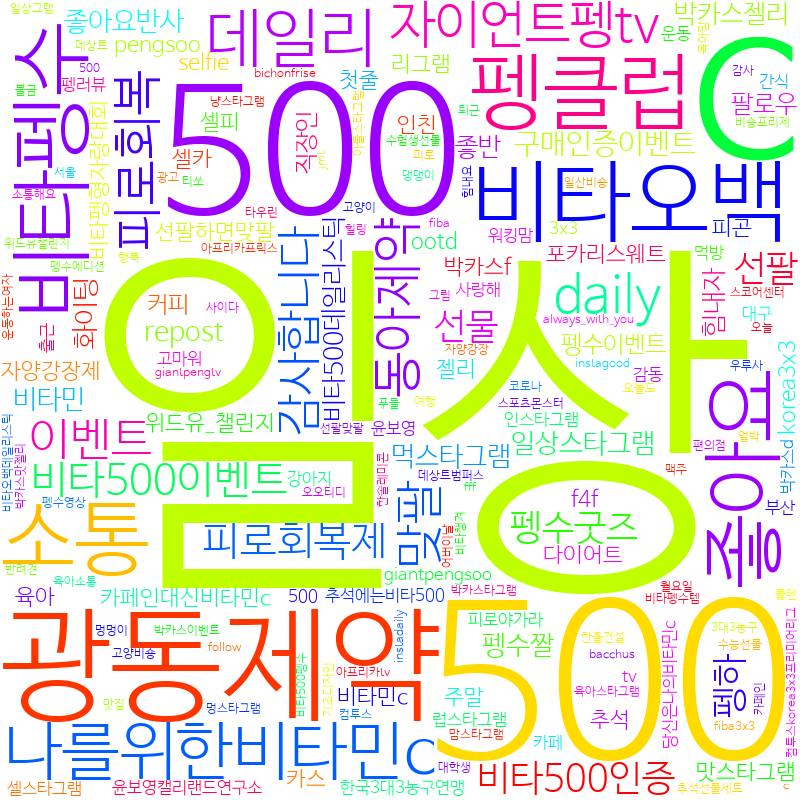

In [105]:
cloud.to_image()

# 2. Embedding

### - LSA

### - tags

In [106]:
tdm.shape

(206772, 10000)

In [107]:
# one hot encoding
import numpy as np

one_hot = np.eye(10000)

In [108]:
words = cv.get_feature_names()

In [109]:
tokens = tags

In [110]:
%%time
doc = np.zeros((1, 10000))

for token in tokens:
    try:
        i = words.index(token)
        doc += one_hot[i]
    except ValueError:
        pass

Wall time: 1min 14s


In [111]:
from sklearn.decomposition import TruncatedSVD

In [112]:
svd = TruncatedSVD(n_components=1000)

In [113]:
svd.fit(tdm)

TruncatedSVD(algorithm='randomized', n_components=1000, n_iter=5,
             random_state=None, tol=0.0)

In [114]:
svd.components_.shape

(1000, 10000)

In [115]:
word_emb = svd.components_.T

In [116]:
indices = []
target = list(word_count.sort_values('빈도', ascending=False)['단어'][0:100])
for w in target:
    i = words.index(w)
    indices.append(i)
    print(w, i)

일상 7254
광동제약 792
일상 1030
비타챙겨 925
건강뿜뿜 770
마시는비타민c 845
신이나 971
펭수비타500 1119
내몸에비타 814
힘내세요 1171
펭타 1130
까꿍 806
건강음료 771
비타500주세요 908
건강챙겨얍 772
할수이따 1154
광동제약 1840
비타오백 4695
비타펭수 4710
소통 5059
펭클럽 8932
좋아요 7837
나를위한비타민c 2424
데일리 3200
자이언트펭tv 7360
daily 235
피로회복 9177
동아제약 3331
맞팔 3941
감사합니다 1321
이벤트 7111
비타500이벤트 4658
피로회복제 9186
비타500인증 4661
박카스 881
선물 4930
선팔 4946
펭수굿즈 8853
펭하 8941
구매인증이벤트 1952
일상스타그램 7264
먹스타그램 3990
화이팅 9749
비타민 4675
좋아요반사 7842
펭수짤 8912
repost 595
좋반 7829
박카스젤리 4282
비타500데일리스틱 4643
힘내자 9943
팔로우 8777
펭수이벤트 8902
커피 8402
직장인 7994
카페인대신비타민c 8358
위드유_챌린지 6866
맛스타그램 3889
자양강장제 7343
카스 8337
비타민c 4680
선팔하면맞팔 4951
셀카 5018
젤리 7723
pengsoo 551
f4f 282
박카스f 4237
리그램 3694
비타펭형자랑대회 4717
피곤 9116
셀피 5024
육아 6943
korea3x3 443
주말 7887
추석 8216
ootd 537
포카리스웨트 9009
인친 7222
selfie 615
비타오백 920
첫줄 8123
다이어트 2866
윤보영캘리랜드연구소 6992
럽스타그램 3618
간식 1277
박카스d 4235
감동 1303
대구 2991
사랑해 4760
강아지 1366
셀스타그램 5017

In [117]:
word_emb = svd.components_.T

In [118]:
from adjustText import adjust_text
from matplotlib import pyplot
from matplotlib import font_manager, rc

In [119]:
font_name = font_manager.FontProperties(fname="NanumBarunGothicLight.ttf").get_name()
rc('font', family=font_name)

Wall time: 3min 2s


73

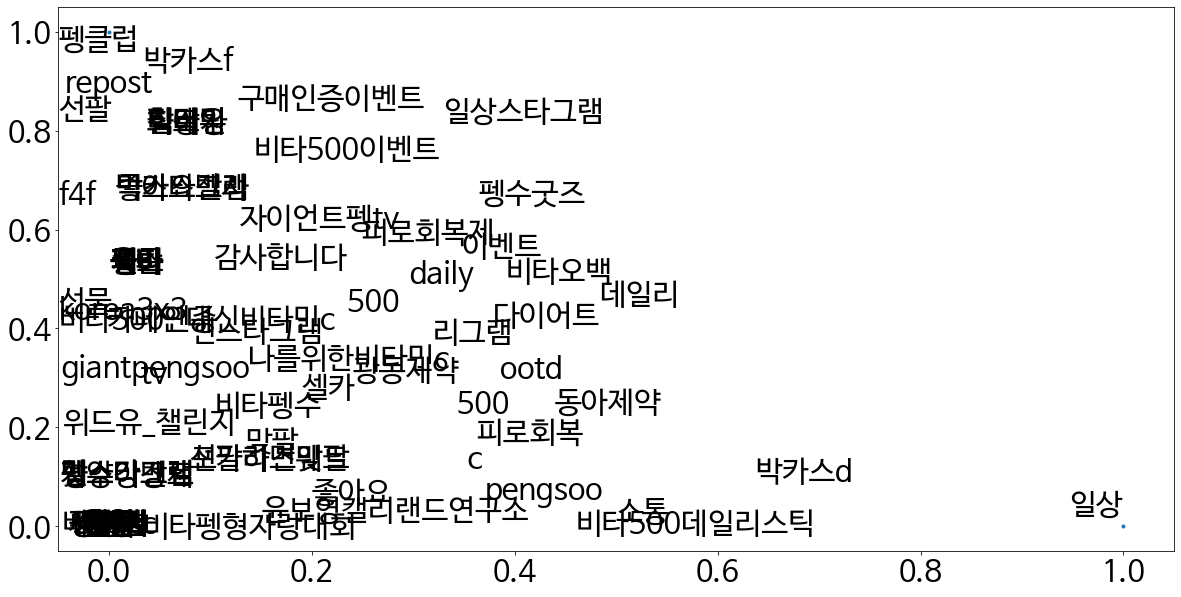

In [120]:
%%time

comp1 = 0
comp2 = 1

pyplot.rcParams["figure.figsize"] = (20,10)
pyplot.plot(word_emb[indices, comp1], word_emb[indices, comp2], '.')

texts = [pyplot.text(word_emb[i, comp1], word_emb[i, comp2], w) for i, w in zip(indices, target)]

adjust_text(texts)

### - T-SNE

In [121]:
from sklearn.manifold import TSNE

In [122]:
tsne = TSNE()

In [123]:
%%time
pos = tsne.fit_transform(word_emb)

Wall time: 21min 5s


169

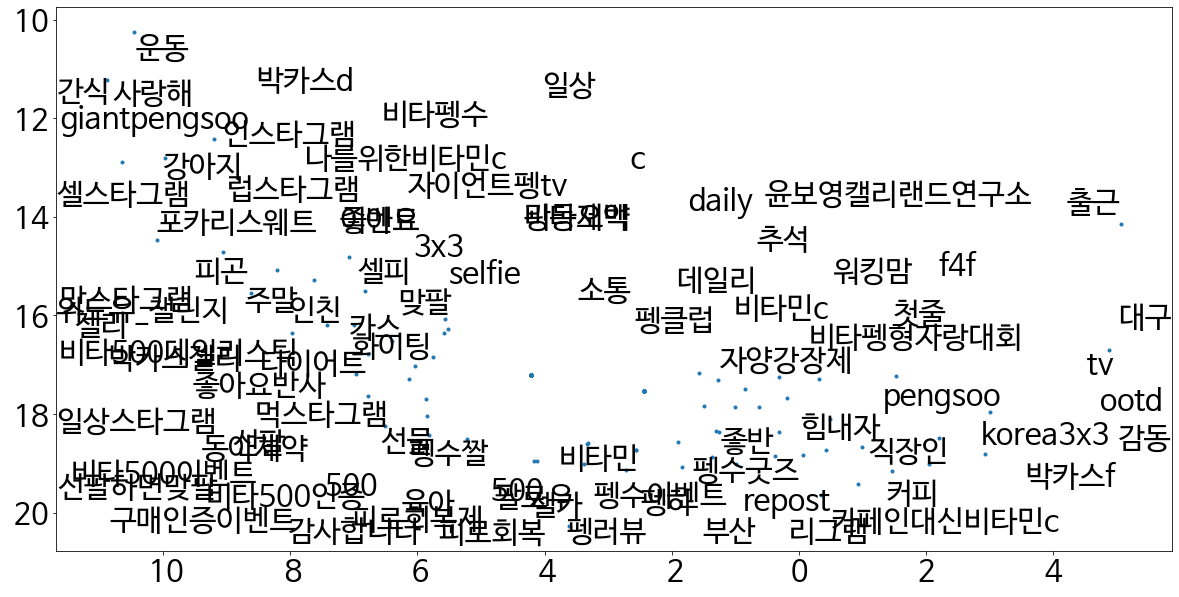

In [124]:
pyplot.rcParams["figure.figsize"] = (20,10)

pyplot.plot(pos[indices, 0], pos[indices, 1], '.')

texts = [pyplot.text(pos[i, 0], pos[i, 1], w) for i, w in zip(indices, target)]

adjust_text(texts)

### - Word2Vec

In [125]:
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
from sklearn.decomposition import PCA

In [132]:
sentences = list(df['Hashtags'])

In [133]:
model = Word2Vec(sentences, size = 1000, min_count = 100, workers = 4, window = 100) # negative, sg

In [134]:
word_vectors = model.wv
vocabs = word_vectors.vocab.keys()
word_vectors_list = [word_vectors[v] for v in vocabs]

In [135]:
pca = PCA(n_components = 2)
xys = pca.fit_transform(word_vectors_list)
xs = xys[:,0]
ys = xys[:,1]

In [136]:
font_name = font_manager.FontProperties(fname="NanumBarunGothicLight.ttf").get_name()
rc('font', family=font_name, size = 15)

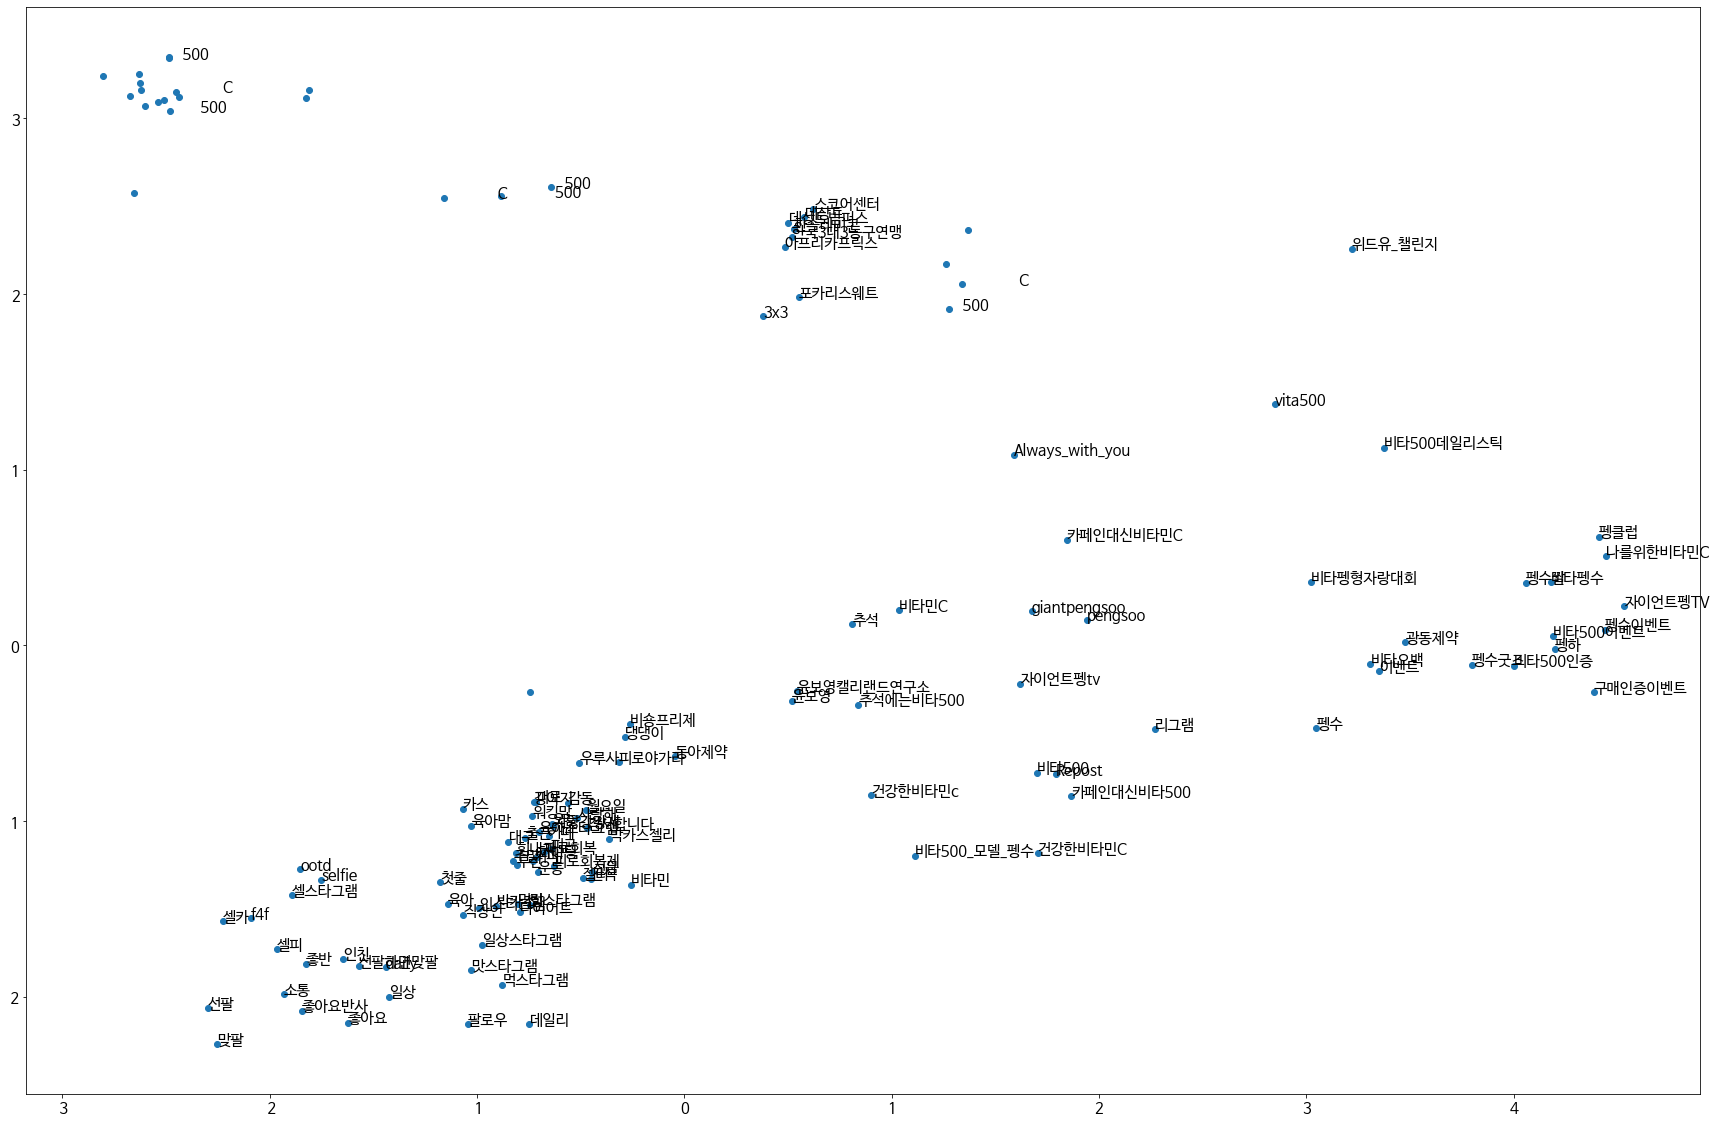

In [137]:
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = [30, 20]
plt.scatter(xs, ys)
for i,v in enumerate(vocabs):
    plt.annotate(v, xy = (xs[i], ys[i]))

# Location 분석

## - Word Cloud

In [69]:
locates = [element for array in list(df.Locates) for element in array]

In [70]:
monster_lc_stop_words = ['error','','south','korea']
cv = CountVectorizer(max_features=10000, stop_words = monster_lc_stop_words)
tdm = cv.fit_transform(locates)
word_count = pd.DataFrame({
    '단어': cv.get_feature_names(),
    '빈도': tdm.sum(axis=0).flat 
})

In [71]:
word_count.sort_values('빈도', ascending=False).head()

,단어,빈도
479,seoul,119
74,busan,63
139,daegu,61
1164,박카스,57
1581,어딘가,43


In [72]:
wc = WordCloud(background_color='white',
               width=800, height=800, 
               font_path='NanumBarunGothicLight.ttf',
              colormap = 'hsv', # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
              max_words = 200)

In [73]:
count_dic = word_count.set_index('단어')['빈도'].to_dict()
cloud = wc.fit_words(count_dic)

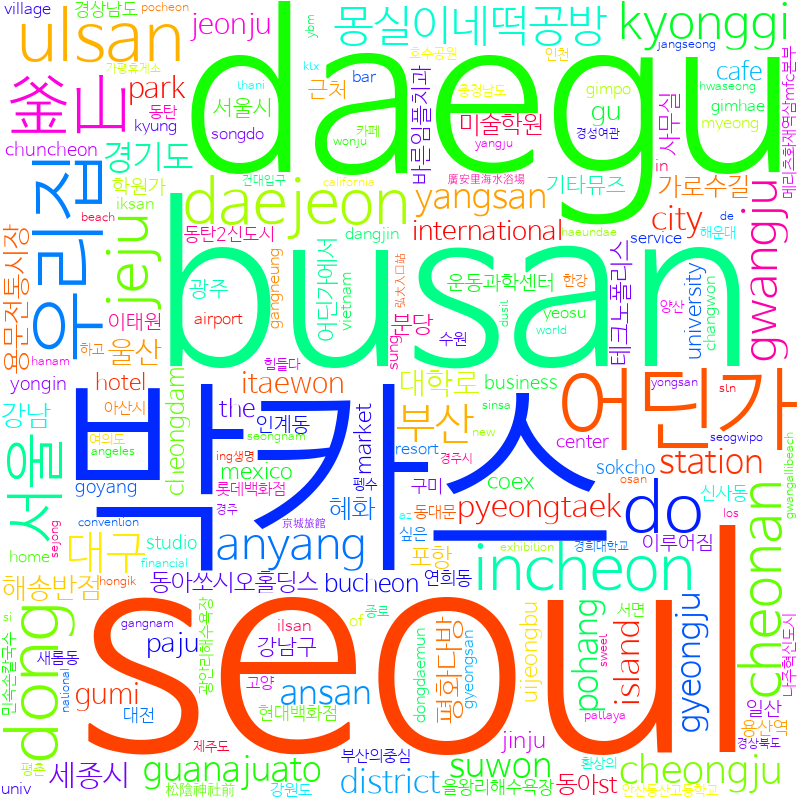

In [74]:
cloud.to_image()

## - Embedding

- LSA

In [75]:
tdm.shape

(2499, 2234)

In [76]:
# one hot encoding
import numpy as np

one_hot = np.eye(tdm.shape[1])

In [77]:
words = cv.get_feature_names()
tokens = locates

In [78]:
%%time
doc = np.zeros((1, tdm.shape[1]))

for token in tokens:
    try:
        i = words.index(token)
        doc += one_hot[i]
    except ValueError:
        pass

Wall time: 96.2 ms


In [79]:
%%time
svd = TruncatedSVD(n_components=1000)
svd.fit(tdm)

Wall time: 2.26 s


TruncatedSVD(algorithm='randomized', n_components=1000, n_iter=5,
             random_state=None, tol=0.0)

In [80]:
svd.components_.shape

(1000, 2234)

In [81]:
word_emb = svd.components_.T

In [82]:
indices = []
target = list(word_count.sort_values('빈도', ascending=False)['단어'][0:100])
for w in target:
    i = words.index(w)
    indices.append(i)
    print(w, i)

seoul 479
busan 74
daegu 139
박카스 1164
어딘가 1581
우리집 1698
釜山 631
dong 160
do 156
ulsan 563
daejeon 140
incheon 276
서울 1332
cheonan 98
jeju 292
kyonggi 324
gwangju 235
대구 906
anyang 28
몽실이네떡공방 1117
부산 1231
cheongju 101
경기도 678
guanajuato 225
suwon 533
yangsan 598
pohang 432
station 518
gyeongju 239
ansan 26
세종시 1387
island 283
평화다방 2084
city 116
울산 1708
대학로 940
pyeongtaek 439
district 153
해송반점 2159
itaewon 285
jeonju 294
gumi 226
park 417
강남 649
용문전통시장 1684
international 281
가로수길 634
paju 413
혜화 2181
gu 224
동아st 986
동아쏘시오홀딩스 988
어딘가에서 1582
포항 2090
cheongdam 99
테크노폴리스 2041
cafe 77
bucheon 68
the 549
미술학원 1147
사무실 1279
분당 1253
서울시 1341
근처 788
market 351
학원가 2126
이루어짐 1759
운동과학센터 1703
uijeongbu 559
mexico 362
일산 1803
바른임플치과 1161
university 566
hotel 262
광주 741
이태원 1777
기타뮤즈 797
jinju 299
coex 121
강남구 651
인계동 1781
center 88
을왕리해수욕장 1746
chuncheon 109
구미 760
신사동 1487
sokcho 505
business 75
경상남도 685
동탄2신도시 995
현대백화점 2178
studio 523
goyang 217
대전 925
용산역 1690
yongin 607
연희동 1623
광안리해수욕장 737
제주도 

In [83]:
word_emb = svd.components_.T

In [84]:
font_name = font_manager.FontProperties(fname="NanumBarunGothicLight.ttf").get_name()
rc('font', family=font_name)

Wall time: 37.6 s


100

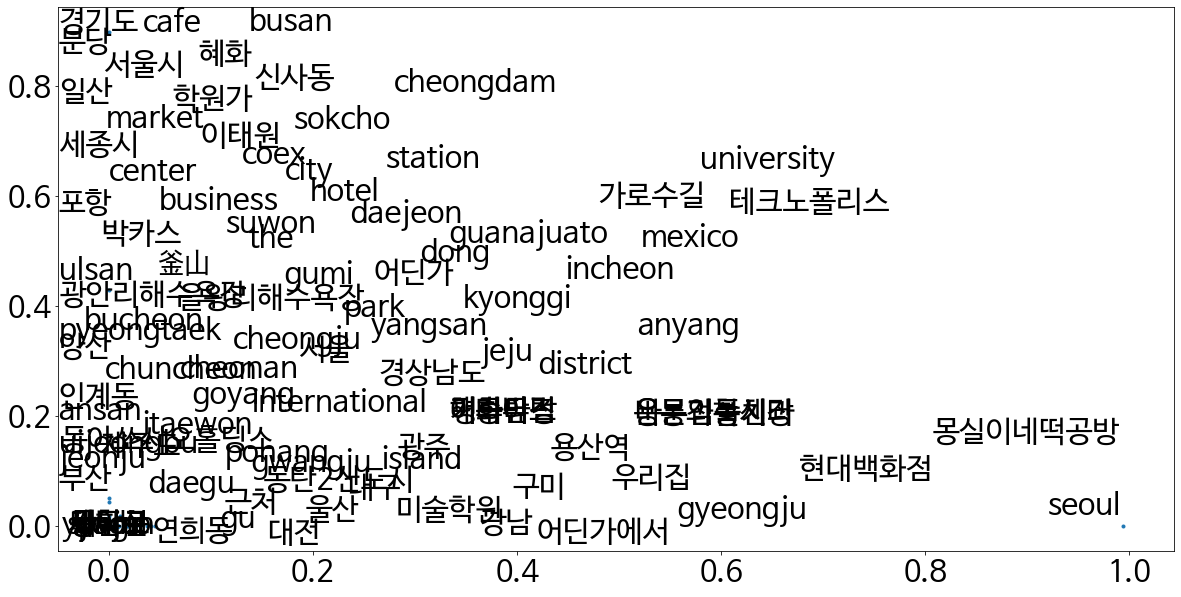

In [85]:
%%time

comp1 = 0
comp2 = 1

pyplot.rcParams["figure.figsize"] = (20,10)
pyplot.plot(word_emb[indices, comp1], word_emb[indices, comp2], '.')

texts = [pyplot.text(word_emb[i, comp1], word_emb[i, comp2], w) for i, w in zip(indices, target)]

adjust_text(texts)

- T-SNE

In [86]:
tsne = TSNE()

In [87]:
%%time
pos = tsne.fit_transform(word_emb)

Wall time: 31.4 s


57

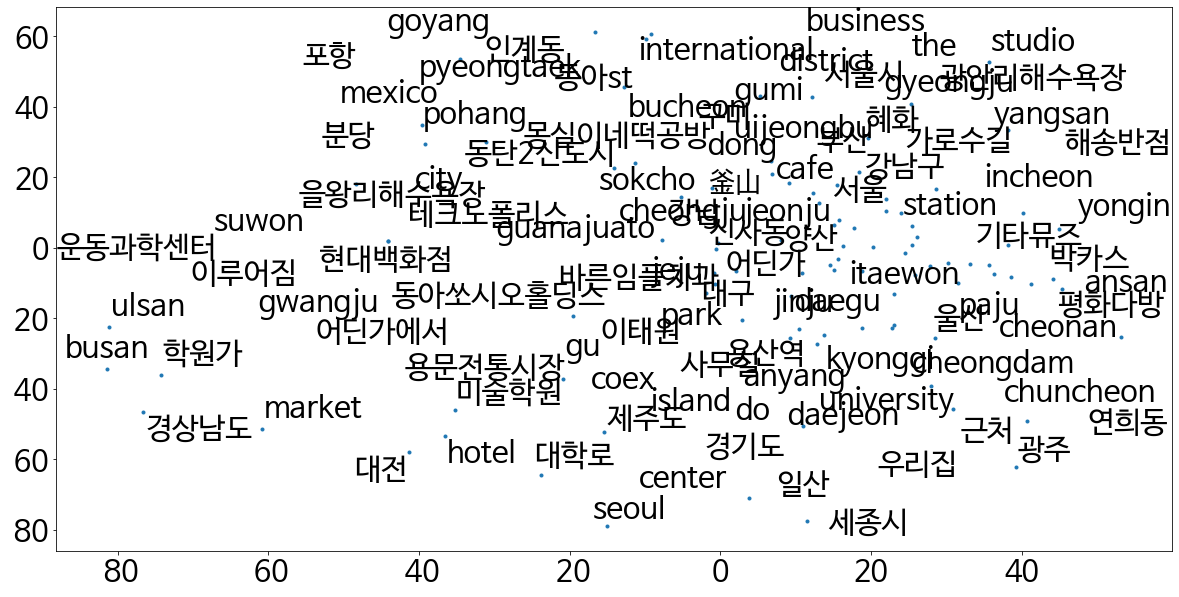

In [88]:
pyplot.rcParams["figure.figsize"] = (20,10)

pyplot.plot(pos[indices, 0], pos[indices, 1], '.')

texts = [pyplot.text(pos[i, 0], pos[i, 1], w) for i, w in zip(indices, target)]

adjust_text(texts)

- Word2Vec

In [89]:
sentences = list(df['Locates'])

In [90]:
model = Word2Vec(sentences, size = 1000, min_count = 20, workers = 4, window = 100)

In [91]:
%%time

word_vectors = model.wv
vocabs = word_vectors.vocab.keys()
word_vectors_list = [word_vectors[v] for v in vocabs]

Wall time: 0 ns


In [92]:
%%time
pca = PCA(n_components = 2)
xys = pca.fit_transform(word_vectors_list)
xs = xys[:,0]
ys = xys[:,1]

Wall time: 3.4 ms


In [93]:
font_name = font_manager.FontProperties(fname="NanumBarunGothicLight.ttf").get_name()
rc('font', family=font_name, size = 30)

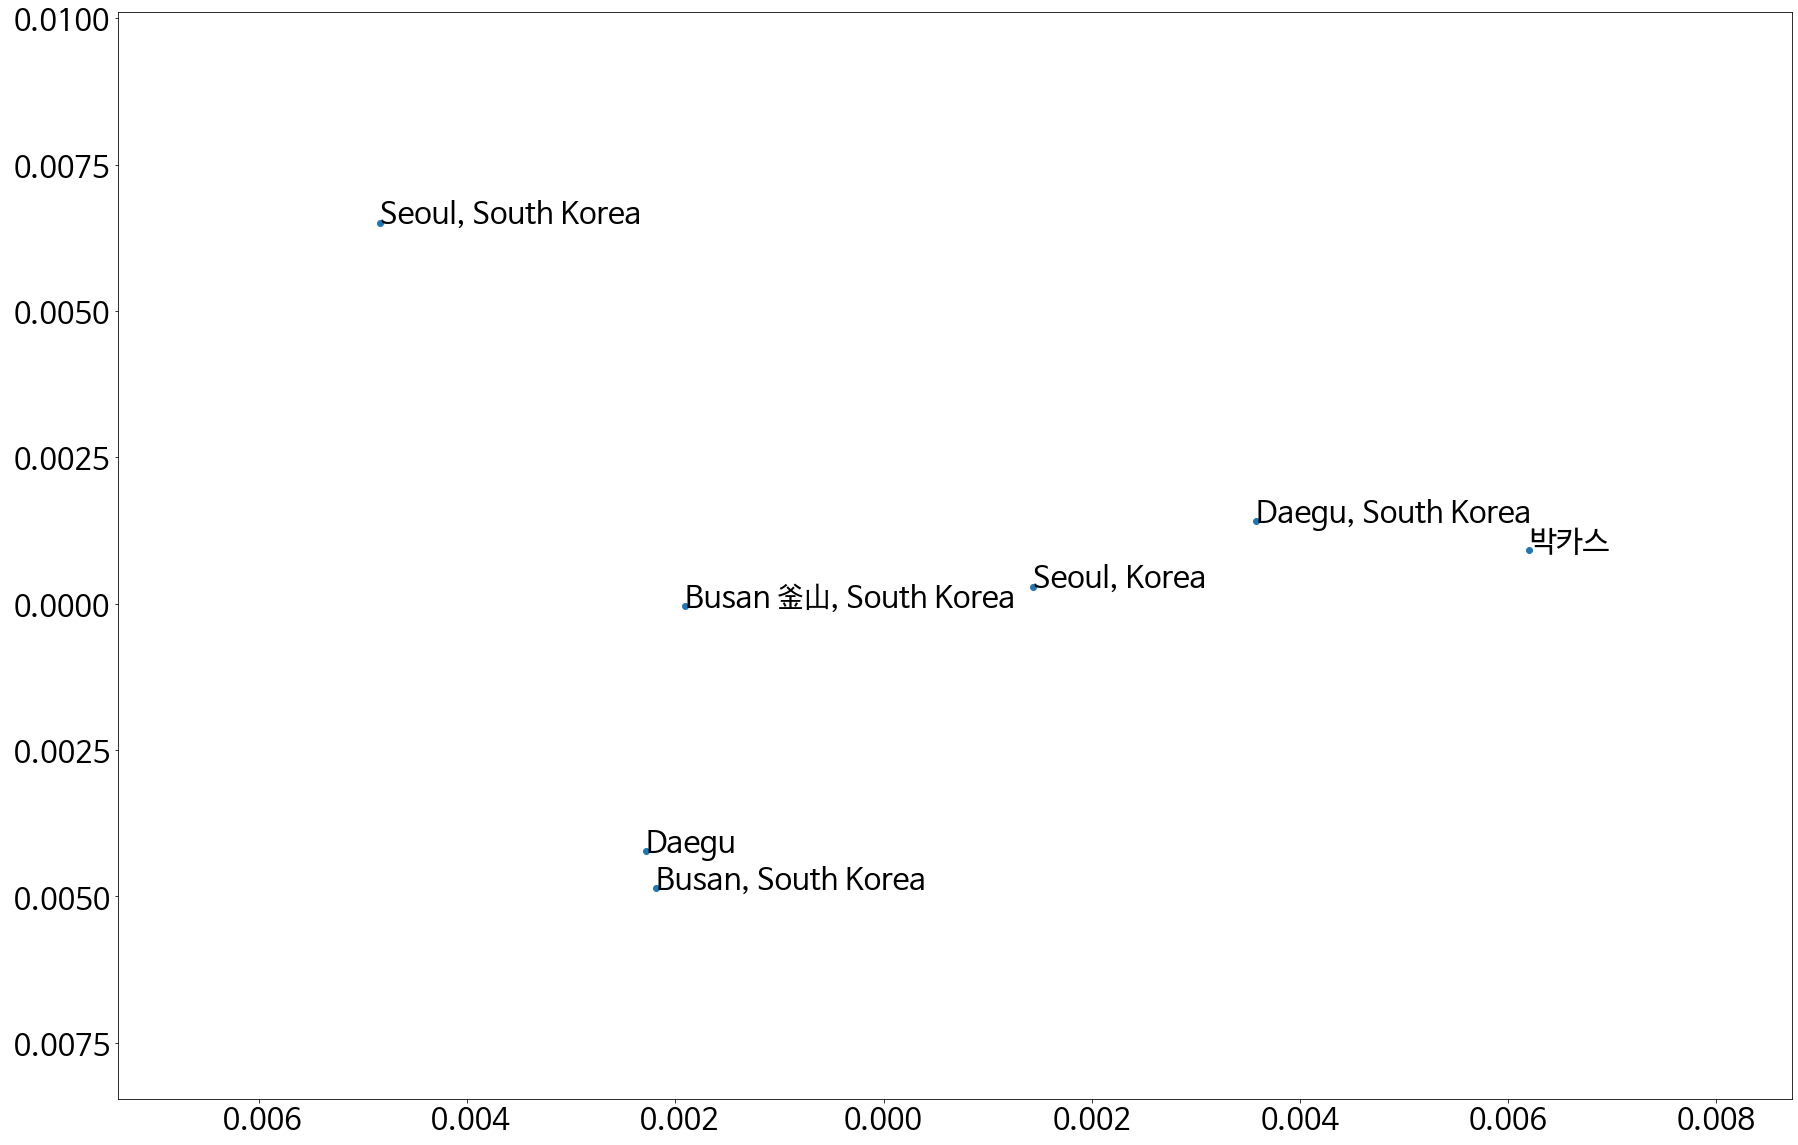

In [94]:
plt.rcParams['figure.figsize'] = [30, 20]
plt.scatter(xs, ys)
for i,v in enumerate(vocabs):
    plt.annotate(v, xy = (xs[i], ys[i]))